In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Implementación del modelo de KNN**

In [2]:
iris = sns.load_dataset("iris")
iris.sample(5, random_state = 0)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa


In [15]:
iris.shape

(150, 5)

In [16]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Figure size 640x480 with 0 Axes>

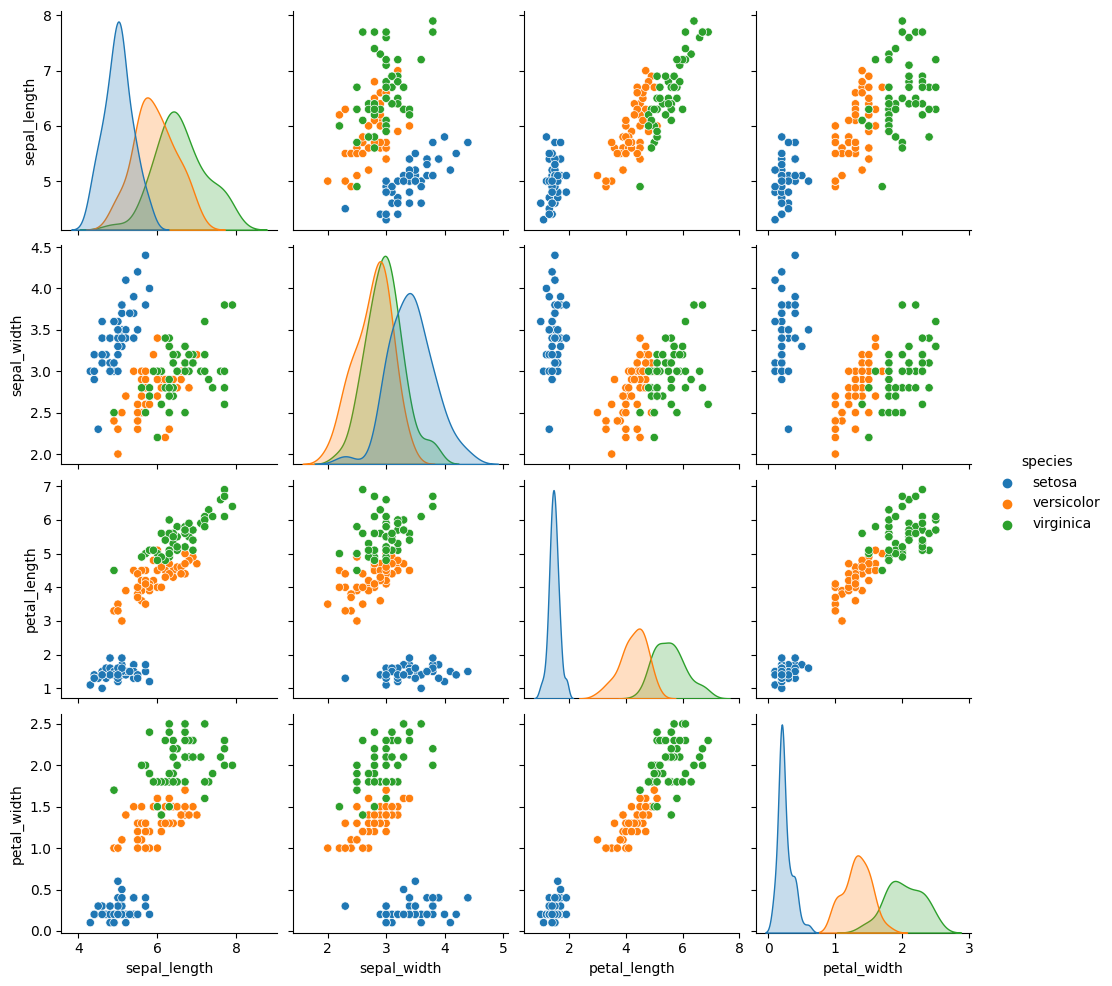

In [17]:
plt.figure()
sns.pairplot(iris, hue = 'species')
plt.show()

<Figure size 640x480 with 0 Axes>

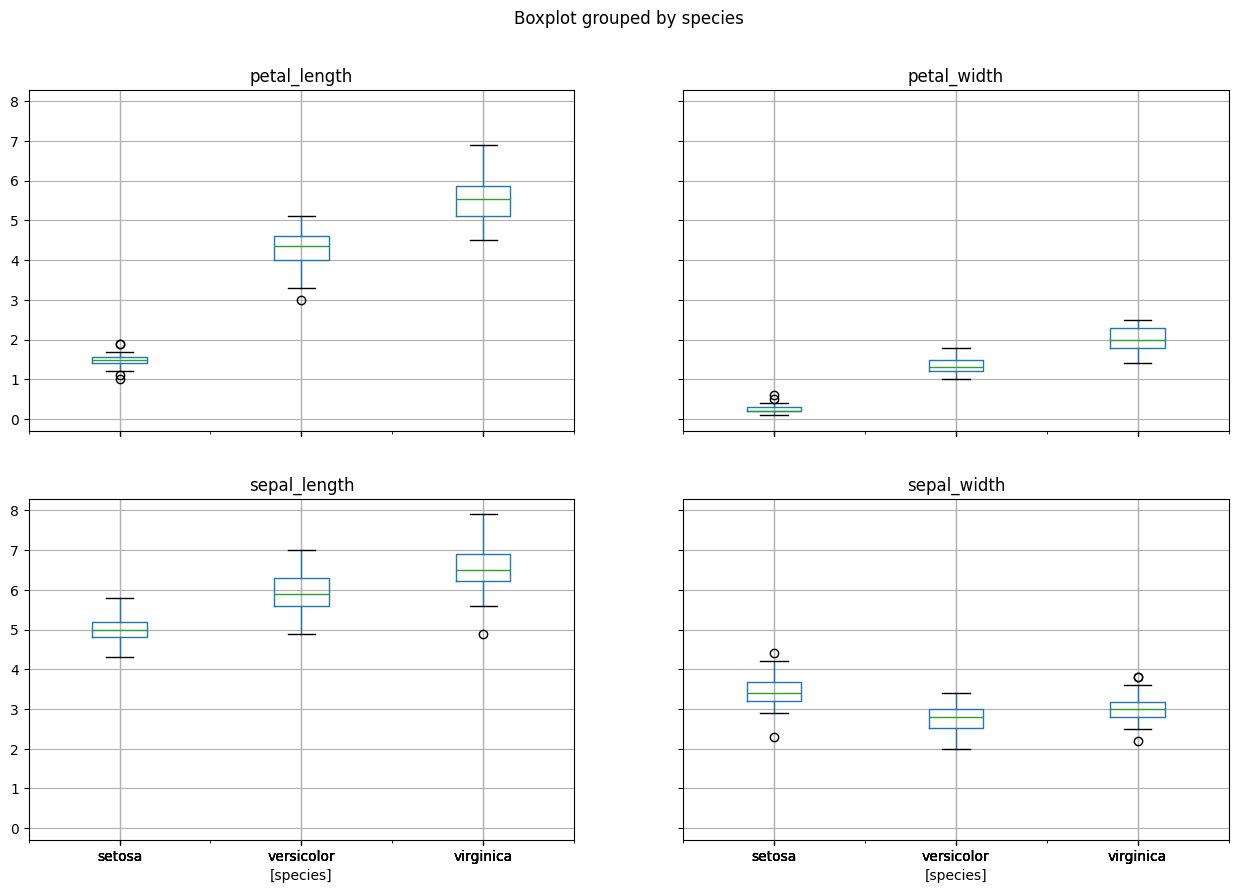

In [40]:
plt.figure()
iris.boxplot(by="species", figsize=(15, 10))
plt.show()

In [14]:
import sklearn

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris[['sepal_length','sepal_width','petal_length','petal_width']], iris['species'], random_state=0 )

In [32]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


In [33]:
y_train.head()

61     versicolor
92     versicolor
112     virginica
2          setosa
141     virginica
Name: species, dtype: object

In [36]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [37]:
y_test.head()

114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
Name: species, dtype: object

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn = KNeighborsClassifier(n_neighbors=3)

In [84]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [85]:
prediction = knn.predict(X_test)
prediction

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype=object)

In [86]:
y_test + "  " +  prediction

114      virginica  virginica
62     versicolor  versicolor
33             setosa  setosa
107      virginica  virginica
7              setosa  setosa
100      virginica  virginica
40             setosa  setosa
86     versicolor  versicolor
76     versicolor  versicolor
71     versicolor  versicolor
134      virginica  virginica
51     versicolor  versicolor
73     versicolor  versicolor
54     versicolor  versicolor
63     versicolor  versicolor
37             setosa  setosa
78     versicolor  versicolor
90     versicolor  versicolor
45             setosa  setosa
16             setosa  setosa
121      virginica  virginica
66     versicolor  versicolor
24             setosa  setosa
8              setosa  setosa
126      virginica  virginica
22             setosa  setosa
44             setosa  setosa
97     versicolor  versicolor
93     versicolor  versicolor
26             setosa  setosa
137      virginica  virginica
84     versicolor  versicolor
27             setosa  setosa
127      v

In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
matrix= confusion_matrix(y_test, prediction)
matrix

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

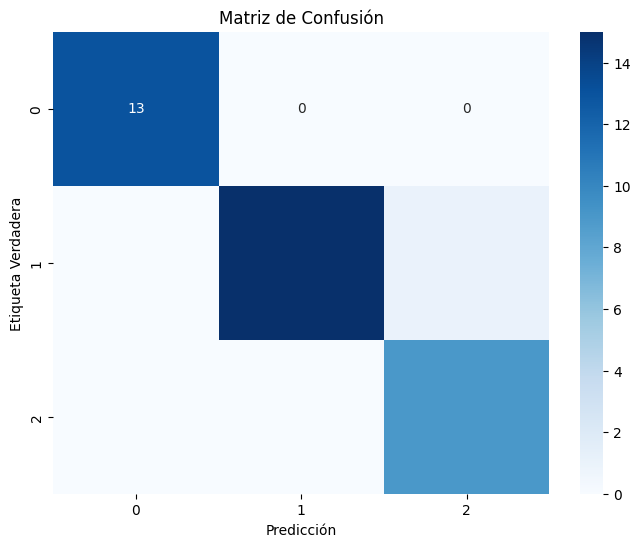

In [89]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión")
plt.show()

In [93]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 3)
scores = cross_val_score(knn, iris[['sepal_length','sepal_width','petal_length','petal_width']], iris['species'], cv=5, scoring='accuracy')

print(scores)

print(scores.mean())

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
0.9666666666666668


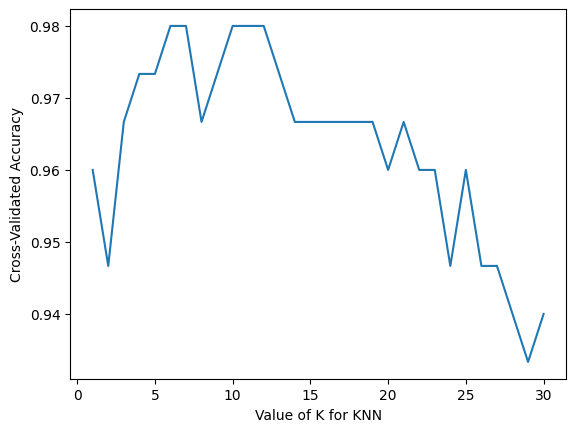

In [94]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, iris[['sepal_length','sepal_width','petal_length','petal_width']], iris['species'], cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

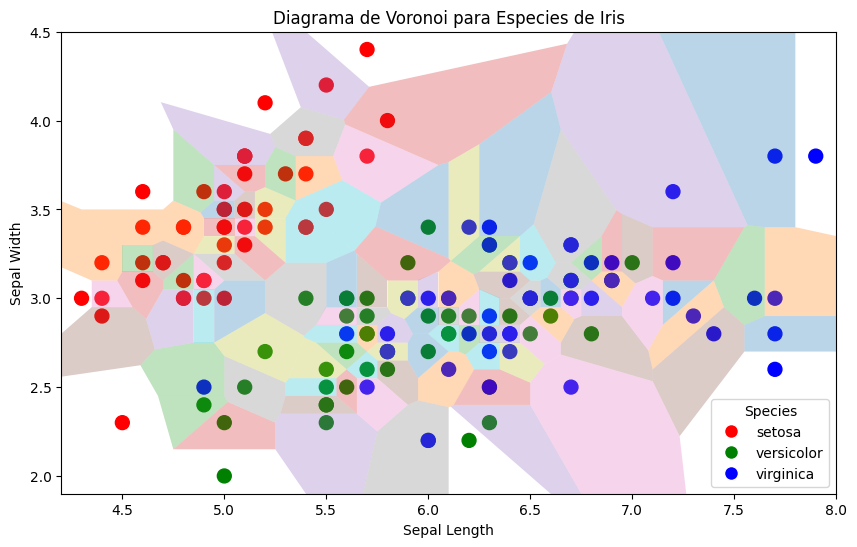

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi

# Datos de características
X = iris[['sepal_length', 'sepal_width']].values

# Crear un mapeo de colores para las especies
species_colors = {
    'setosa': 'r',
    'versicolor': 'g',
    'virginica': 'b'
}

# Asignar un color a cada punto de datos según la especie
colors = [species_colors[species] for species in iris['species']]

# Calcular el diagrama de Voronoi
vor = Voronoi(X)

# Graficar el diagrama de Voronoi coloreando las regiones según la especie
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.xlim(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
plt.ylim(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

# Dibujar las líneas del diagrama de Voronoi
for region in vor.regions:
    if -1 not in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), alpha=0.3)

# Crear leyendas personalizadas para las especies
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=species, 
                             markersize=10, markerfacecolor=colors[0]) for species, colors[0] in species_colors.items()]
plt.legend(handles=legend_handles, title='Species')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Diagrama de Voronoi para Especies de Iris')
plt.show()


/var/folders/_s/f342dwg966zcnyzd3gsv51k80000gn/T/ipykernel_14165/2115809638.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name, cmap=plt.cm.RdYlBu, edgecolor='k', s=80)


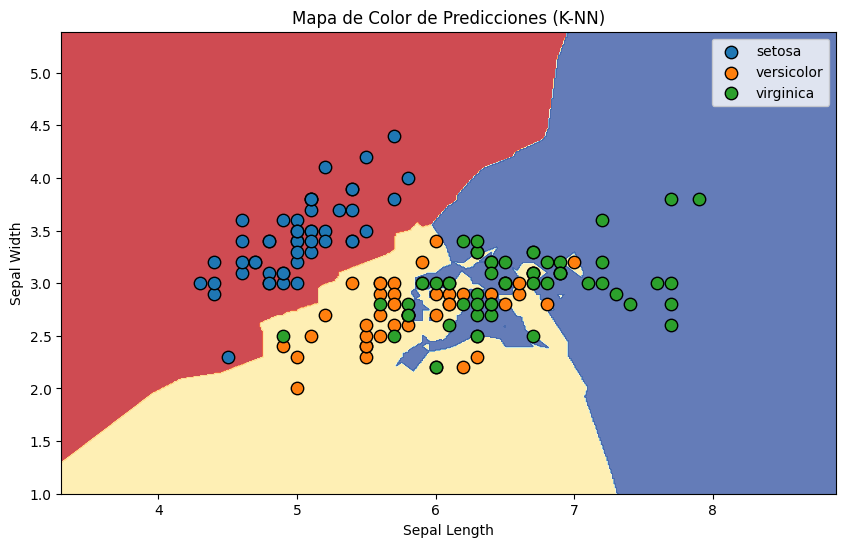

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Tomar solo las dos primeras características para la visualización
y = iris.target

# Entrenar un modelo K-NN con, por ejemplo, k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Crear una malla de puntos para la visualización del mapa de color
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Realizar predicciones en la malla de puntos
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear el mapa de color
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)

# Graficar los puntos de datos y agregar etiquetas de especies
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name, cmap=plt.cm.RdYlBu, edgecolor='k', s=80)

# Agregar leyenda
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Mapa de Color de Predicciones (K-NN)')
plt.show()
